<a href="https://colab.research.google.com/github/God-Serenaa/AES-x-DNA/blob/main/AES_x_DNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library functions

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


s_box = (
    [0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76],
    [0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0],
    [0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15],
    [0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75],
    [0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84],
    [0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF],
    [0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8],
    [0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2],
    [0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73],
    [0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB],
    [0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79],
    [0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08],
    [0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A],
    [0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E],
    [0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF],
    [0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16],
)
inv_s_box = [
    [0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB],
    [0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB],
    [0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E],
    [0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25],
    [0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92],
    [0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84],
    [0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06],
    [0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B],
    [0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73],
    [0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E],
    [0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B],
    [0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4],
    [0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F],
    [0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF],
    [0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61],
    [0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D],
]
xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)


def mix_single_column(a):
    # please see Sec 4.1.2 in The Design of Rijndael
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)
    return a


def mix_columns(text):
    l = []
    for i in range(4):
        for val in mix_single_column(text[:4]):
            l.append(val)
        text = text[4:]
    return l


def inv_mix_columns(text):
    # see Sec 4.1.3 in The Design of Rijndael
    s = []
    c = 0
    for i in range(4):
        l = []
        for j in range(4):
            l.append(text[c])
            c += 1
        s.append(l)
    for i in range(4):
        u = xtime(xtime(s[i][0] ^ s[i][2]))
        v = xtime(xtime(s[i][1] ^ s[i][3]))
        s[i][0] ^= u
        s[i][1] ^= v
        s[i][2] ^= u
        s[i][3] ^= v
    l = []
    for i in s:
        for j in i:
            l.append(j)
    return mix_columns(l)

def mixing_dna(text):
    e_box = [
        'GATC', 'ACGT', 'CTAG', 'TGCA',
        'CATG', 'TCGA', 'GTAC', 'AGCT',
        'AGCT', 'GTAC', 'TGCA', 'CTAG',
        'TCGA', 'CATG', 'ACGT', 'GATC'
    ]
    dna_map = {'C': "00", 'T': "01", 'A': '10', 'G': '11'}
    l = []
    for i in range(16):
        dna_val = "".join(dna_map[val] for val in e_box[i])
        l.append(eval("0b" + xor(dna_val, bin(text[i])[2:])))
    return l


def inv_permutation(text):
    l = []
    for index in [0, 13, 10, 7, 4, 1, 14, 11, 8, 5, 2, 15, 12, 9, 6, 3]:
        l.append(text[index])
    return l


def permutation(text):
    l = []
    for index in [0, 5, 10, 15, 4, 9, 14, 3, 8, 13, 2, 7, 12, 1, 6, 11]:
        l.append(text[index])
    return l


def key_xor(text, word):
    text_index = 0
    l = []
    w0, w1, w2, w3 = word[0], word[1], word[2], word[3]
    for i in range(4):
        for j in range(4):
            str1 = str(bin(eval("w" + str(i))[j]))[2:]
            str2 = str(bin(text[text_index]))[2:]
            l.append(eval("0b" + xor(str1, str2)))
            text_index += 1
    return l


def xor(a, b):
    ans = ""
    while len(a) < 8:
        a = "0" + a
    while len(b) < 8:
        b = "0" + b
    for i in range(8):
        ans += "1" if a[i] != b[i] else "0"
    return ans

def pad(text):
    if len(text) % 16 != 0:
        text += "{" * (16 - len(text) % 16)
    return text


def unpad(text):
    while text[-1] == "{":
        text = text[:-1]
    return text


def convert_to_hex(text):
    l = []
    for value in text:
        l.append(eval("0x" + str(value.encode('utf-8').hex())))
    return l


def onebitleftshift(text):
    l = []
    for i in range(4):
        if i == 3:
            l.append(text[i - 3])
        else:
            l.append(text[i + 1])
    return l


def bytesubstitution(text, box_name):
    l = []
    for i in range(len(text)):
        hex_value = str(hex(text[i]))
        if len(hex_value) == 4:
            index1, index2 = eval("0x" + hex_value[-2]), eval("0x" + hex_value[-1])
        else:
            index1, index2 = 0, eval("0x" + hex_value[-1])
        l.append(eval(box_name)[index1][index2])
    return l


def addroundkey(text, round):
    all_round_key = [
        ["00000001", "00000000", "00000000", "00000000"],
        ["00000010", "00000000", "00000000", "00000000"],
        ["00000100", "00000000", "00000000", "00000000"],
        ["00001000", "00000000", "00000000", "00000000"],
        ["00010000", "00000000", "00000000", "00000000"],
        ["00100000", "00000000", "00000000", "00000000"],
        ["01000000", "00000000", "00000000", "00000000"],
        ["10000000", "00000000", "00000000", "00000000"],
        ["00011011", "00000000", "00000000", "00000000"],
        ["00110110", "00000000", "00000000", "00000000"]
    ]
    current_round_key = all_round_key[round]
    l = []
    for i in range(4):
        str_text = str(bin(text[i]))[2:]
        l.append(eval("0b" + xor(current_round_key[i], str_text)))
    return l

def dna_mapping(cipher_text):
    inv_dna_map = {'00': 'C', "01": "T", "10": "A", "11":"G"}
    cipher_text_dnafied = ''
    for val in cipher_text:
        bin_val = bin(eval("0x" + val))[2:]
        while len(bin_val) < 4:
            bin_val = "0" + bin_val
        cipher_text_dnafied += inv_dna_map[bin_val[:2]] + inv_dna_map[bin_val[2:]]
    return cipher_text_dnafied

def dna_unmapping(cipher_text_dnafied):
    dna_map = {'C': "00", 'T': "01", 'A': '10', 'G': '11'}
    cipher_text = ''
    while cipher_text_dnafied:
        bin_val = "".join(dna_map[i] for i in cipher_text_dnafied[:2])
        cipher_text += hex(eval("0b" + bin_val))[2:]
        cipher_text_dnafied = cipher_text_dnafied[2:]
    return cipher_text

def reshaped_img(cipher_img, shape):
  return np.asarray(cipher_img, dtype=np.uint8).reshape(shape)

#OG AES

In [ ]:
class AES_og_128_EBC:
    def __init__(self, k):
        self.key = self.__key_expansion(pad(k))

    def __key_expansion(self, k):
        w = []
        if len(k) > 16:
            k = k[:16]
        else:
            k = pad(k)
        for i in range(0, 16, 4):
            w.append(convert_to_hex(k[i:i + 4]))
        for round in range(10):
            for i in range(4):
                if i == 0:
                    w1 = addroundkey(bytesubstitution(onebitleftshift(w[-1]), "s_box"), round)
                else:
                    w1 = w[-1]
                w2 = w[-4]
                l = []
                for j in range(4):
                    str_w1 = str(bin(w1[j]))[2:]
                    str_w2 = str(bin(w2[j]))[2:]
                    l.append(eval("0b" + xor(str_w1, str_w2)))
                w.append(l)
        return w

    def __encrypt_txt_block(self, block):
        hexed = convert_to_hex(block)
        all_round_cipher_text = [hexed]
        text = key_xor(hexed, self.key[:4])
        dupe_key = self.key[4:]
        for _ in range(9):
            text = key_xor(mix_columns(permutation(bytesubstitution(text, "s_box"))), dupe_key[:4])
            all_round_cipher_text.append(text)
            dupe_key = dupe_key[4:]
        all_round_cipher_text.append(key_xor(permutation(bytesubstitution(text, "s_box")), dupe_key[:4]))
        return all_round_cipher_text[-1]
    
    def __encrypt_img_block(self, hexed):
        all_round_cipher_text = [hexed]
        text = key_xor(hexed, self.key[:4])
        dupe_key = self.key[4:]
        for _ in range(9):
            text = key_xor(mix_columns(permutation(bytesubstitution(text, "s_box"))), dupe_key[:4])
            all_round_cipher_text.append(text)
            dupe_key = dupe_key[4:]
        all_round_cipher_text.append(key_xor(permutation(bytesubstitution(text, "s_box")), dupe_key[:4]))
        return all_round_cipher_text[-1]
    
    def img_encrypt(self, img):
      shape = img.shape
      flat = img.flatten().tolist()
      l = []
      cipher_img = []
      for pixel in flat:
        l.append(pixel)
        if len(l) == 16:
          for value in self.__encrypt_img_block(l):
            cipher_img.append(value)
          l = []
      return reshaped_img(cipher_img, shape)

    def txt_encrypt(self, plain_text):
        padded_plain_text = pad(plain_text)
        cipher_text = []
        while padded_plain_text:
            for value in self.__encrypt_txt_block(padded_plain_text[:16]):
                cipher_text.append(value)
            padded_plain_text = padded_plain_text[16:]
        return "".join(str(hex(i))[2:] if i > 15 else "0" + str(hex(i))[2:] for i in cipher_text)

    def __decrypt_img_block(self, cipher_img):
        dupe_key = self.key
        text = bytesubstitution(inv_permutation(key_xor(cipher_img, dupe_key[-4:])), "inv_s_box")
        dupe_key = dupe_key[:-4]
        for _ in range(9):
            text = bytesubstitution(inv_permutation(inv_mix_columns(key_xor(text, dupe_key[-4:]))), "inv_s_box")
            dupe_key = dupe_key[:-4]
        return key_xor(text, dupe_key)

    def img_decrypt(self, img):
        shape = img.shape
        flat = img.flatten().tolist()
        plain_img = []
        l = []
        plain_img = []
        for pixel in flat:
          l.append(pixel)
          if len(l) == 16:
            for value in self.__decrypt_img_block(l):
              plain_img.append(value)
            l = []
        return reshaped_img(plain_img, shape)
    
    def txt_decrypt(self, cipher_text):
        plain_text = ""
        while cipher_text:
            l = []
            for _ in range(16):
                l.append(eval("0x" + cipher_text[:2]))
                cipher_text = cipher_text[2:]
            plain_text += self.__decrypt_txt_block(l)
        return plain_text

    def __decrypt_txt_block(self, cipher_matrix):
        dupe_key = self.key
        text = bytesubstitution(inv_permutation(key_xor(cipher_matrix, dupe_key[-4:])), "inv_s_box")
        dupe_key = dupe_key[:-4]
        for _ in range(9):
            text = bytesubstitution(inv_permutation(inv_mix_columns(key_xor(text, dupe_key[-4:]))), "inv_s_box")
            dupe_key = dupe_key[:-4]
        text = key_xor(text, dupe_key)
        plain_string = "".join(str(hex(i))[2:] if i > 15 else "0" + str(hex(i))[2:] for i in text)
        return unpad(bytes.fromhex(plain_string).decode("ASCII"))

#AES x DNA

In [ ]:
class AES_x_DNA_128_EBC:
    def __init__(self, k):
        self.key = self.__key_expansion(pad(k))

    def __key_expansion(self, k):
        w = []
        if len(k) > 16:
            k = k[:16]
        else:
            k = pad(k)
        for i in range(0, 16, 4):
            w.append(convert_to_hex(k[i:i + 4]))
        for round in range(10):
            for i in range(4):
                if i == 0:
                    w1 = addroundkey(bytesubstitution(onebitleftshift(w[-1]), "s_box"), round)
                else:
                    w1 = w[-1]
                w2 = w[-4]
                l = []
                for j in range(4):
                    str_w1 = str(bin(w1[j]))[2:]
                    str_w2 = str(bin(w2[j]))[2:]
                    l.append(eval("0b" + xor(str_w1, str_w2)))
                w.append(l)
        return w

    def __encrypt_txt_block(self, block):
        hexed = convert_to_hex(block)
        all_round_cipher_text = [hexed]
        text = key_xor(hexed, self.key[:4])
        dupe_key = self.key[4:]
        for _ in range(9):
            text = key_xor(mixing_dna(permutation(bytesubstitution(text, "s_box"))), dupe_key[:4])
            all_round_cipher_text.append(text)
            dupe_key = dupe_key[4:]
        all_round_cipher_text.append(key_xor(permutation(bytesubstitution(text, "s_box")), dupe_key[:4]))
        return all_round_cipher_text[-1]
    
    def __encrypt_img_block(self, hexed):
        all_round_cipher_text = [hexed]
        text = key_xor(hexed, self.key[:4])
        dupe_key = self.key[4:]
        for _ in range(9):
            text = key_xor(mixing_dna(permutation(bytesubstitution(text, "s_box"))), dupe_key[:4])
            all_round_cipher_text.append(text)
            dupe_key = dupe_key[4:]
        all_round_cipher_text.append(key_xor(permutation(bytesubstitution(text, "s_box")), dupe_key[:4]))
        return all_round_cipher_text[-1]
    
    def img_encrypt(self, img):
      shape = img.shape
      flat = img.flatten().tolist()
      l = []
      cipher_img = []
      for pixel in flat:
        l.append(pixel)
        if len(l) == 16:
          for value in self.__encrypt_img_block(l):
            cipher_img.append(value)
          l = []
      return reshaped_img(cipher_img, shape)

    def txt_encrypt(self, plain_text):
        padded_plain_text = pad(plain_text)
        cipher_text = []
        while padded_plain_text:
            for value in self.__encrypt_txt_block(padded_plain_text[:16]):
                cipher_text.append(value)
            padded_plain_text = padded_plain_text[16:]
        return dna_mapping("".join(str(hex(i))[2:] if i > 15 else "0" + str(hex(i))[2:] for i in cipher_text))

    def __decrypt_img_block(self, cipher_img):
        dupe_key = self.key
        text = bytesubstitution(inv_permutation(key_xor(cipher_img, dupe_key[-4:])), "inv_s_box")
        dupe_key = dupe_key[:-4]
        for _ in range(9):
            text = bytesubstitution(inv_permutation(mixing_dna(key_xor(text, dupe_key[-4:]))), "inv_s_box")
            dupe_key = dupe_key[:-4]
        return key_xor(text, dupe_key)

    def img_decrypt(self, img):
        shape = img.shape
        flat = img.flatten().tolist()
        plain_img = []
        l = []
        plain_img = []
        for pixel in flat:
          l.append(pixel)
          if len(l) == 16:
            for value in self.__decrypt_img_block(l):
              plain_img.append(value)
            l = []
        return reshaped_img(plain_img, shape)
    
    def txt_decrypt(self, cipher_text_dnafied):
        plain_text = ""
        cipher_text = dna_unmapping(cipher_text_dnafied)
        while cipher_text:
            l = []
            for _ in range(16):
                l.append(eval("0x" + cipher_text[:2]))
                cipher_text = cipher_text[2:]
            plain_text += self.__decrypt_txt_block(l)
        return plain_text

    def __decrypt_txt_block(self, cipher_matrix):
        dupe_key = self.key
        text = bytesubstitution(inv_permutation(key_xor(cipher_matrix, dupe_key[-4:])), "inv_s_box")
        dupe_key = dupe_key[:-4]
        for _ in range(9):
            text = bytesubstitution(inv_permutation(mixing_dna(key_xor(text, dupe_key[-4:]))), "inv_s_box")
            dupe_key = dupe_key[:-4]
        text = key_xor(text, dupe_key)
        plain_string = "".join(str(hex(i))[2:] if i > 15 else "0" + str(hex(i))[2:] for i in text)
        return unpad(bytes.fromhex(plain_string).decode("ASCII"))

# Encrypting text

In [ ]:
aes = AES_og_128_EBC('aes x dna')
# x
dna = AES_x_DNA_128_EBC('aes x dna')
text = 'Spero omnes homines ardebit in inferno'

using regular AES :

In [ ]:
cipher_text_og_aes = aes.txt_encrypt(text)
cipher_text_og_aes

# recorded execution time: 0.005s

'7f9e8778e634636cd840a68a1d2d48bc8bc57082ac365aab10fb8b5642c2d8912bd9078801aab0f7aa806e1ffe5f083f'

In [ ]:
aes.txt_decrypt(cipher_text_og_aes)

# recorded execution time: 0.004s

'Spero omnes homines ardebit in inferno'

using AES x DNA :

In [ ]:
cipher_text_aes_x_dna = dna.txt_encrypt(text)
cipher_text_aes_x_dna

# recorded execution time: 0.005s

'AGTCACGGAAGGTCACAGTCATATGTGCTTGAGCCTGGCTTGTTGTAGGTGAGTGTCAGACCGGTAAGTCCGGCTTTCACGACGTATATGTTTTGATCCGCCCTGCTCTTTCTGTTGCCGAAACACCTTAAGGTGAAAGGCGAGACATCATAGCGGGACCATGGTACATCACGTAGAGAGCGCGATCGAGTA'

In [ ]:
dna.txt_decrypt(cipher_text_aes_x_dna)

# recorded execution time: 0.005s

'Spero omnes homines ardebit in inferno'

#Encrypting Image (512x512)

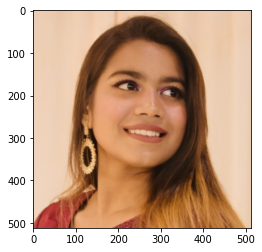

In [ ]:
arshia = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/AES/arshia512.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(arshia);

using regular AES :

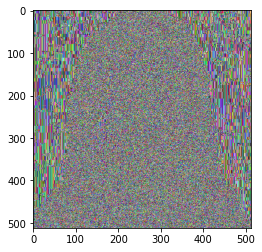

In [ ]:
cipher_arshia_og_aes = aes.img_encrypt(arshia)
plt.imshow(cipher_arshia_og_aes);

# recorded execution time : 273.657s

In [ ]:
plain_arshia_og_aes = aes.img_decrypt(cipher_arshia_og_aes)

# recorded execution time : 247.283s

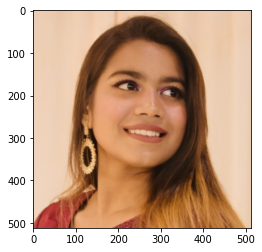

In [ ]:
plt.imshow(plain_arshia_og_aes);

using AES x DNA :

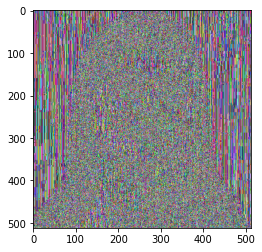

In [ ]:
cipher_arshia_aes_x_dna = dna.img_encrypt(arshia)
plt.imshow(cipher_arshia_aes_x_dna);

# recorded execution time : 295.331s

In [ ]:
plain_arshia_aes_x_dna = dna.img_decrypt(cipher_arshia_aes_x_dna)

# recorded execution time : 295.407s

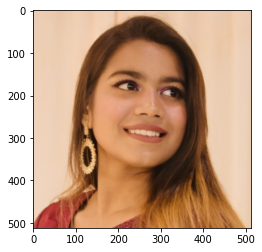

In [ ]:
plt.imshow(plain_arshia_aes_x_dna);

#Histogram

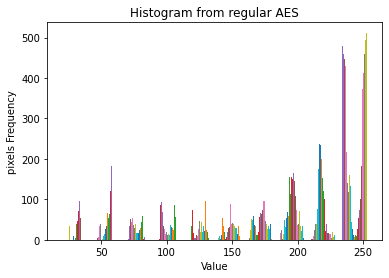

In [ ]:
arshia_2D = arshia[:,:,0]
plt.title("Histogram from regular AES")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
plt.hist(arshia_2D)
plt.show()

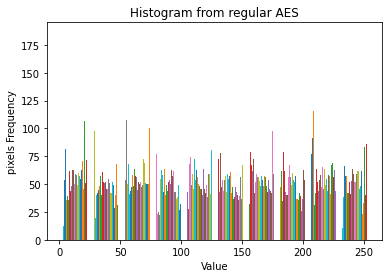

---------------------------------------------------


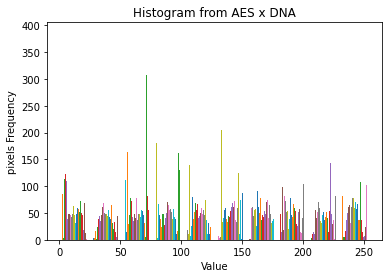

In [ ]:
cipher_arshia_og_aes_2D = cipher_arshia_og_aes[:,:,0]
plt.title("Histogram from regular AES")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
plt.hist(cipher_arshia_og_aes_2D)
plt.show()

print('---------------------------------------------------')
cipher_arshia_aes_x_dna
cipher_arshia_aes_x_dna_2D = cipher_arshia_aes_x_dna[:,:,0]
plt.title("Histogram from AES x DNA")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
plt.hist(cipher_arshia_aes_x_dna_2D)
plt.show()

#Correlation and Convolution

In [ ]:
from scipy.signal import correlate2d

In [ ]:
#cor = correlate2d(arshia_2D, cipher_arshia_aes_x_dna_2D, boundary='fill', mode='same')

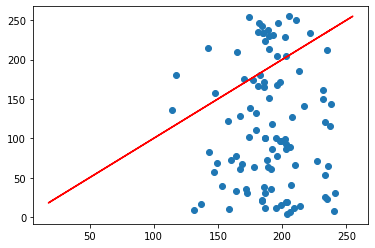

In [ ]:
plt.scatter(arshia_2D.flatten()[-100:],cipher_arshia_aes_x_dna_2D.flatten()[-100:])
plt.plot(arshia_2D.flatten(),arshia_2D.flatten(), 'r')
plt.show()

In [ ]:
len(arshia_2D.flatten())

262144